Reescribiendo la ecuacion (4) del paper obtenemos el siguiente sistema de ODEs

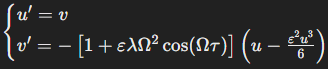

Donde $u$ representa la posicion de la superficie del café y $v$ representa la velocidad de la oscilación del café.

A continuación se resuelve el anterior sistema de ecuaciones usando solve_ivp de Scipy y se presentan las gráficas de las soluciones para dos conjuntos de parámetros.


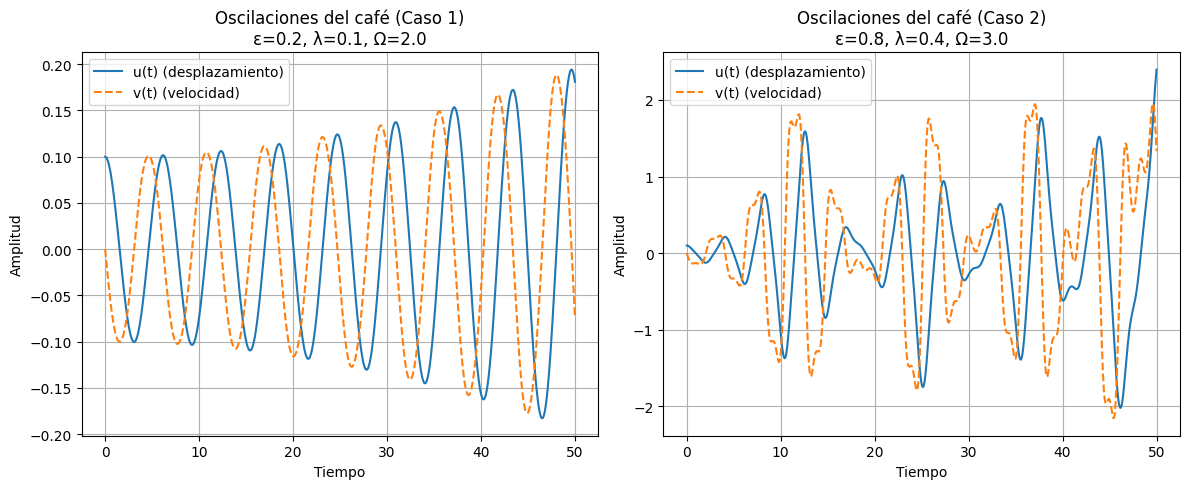

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definimos el sistema de ecuaciones diferenciales
def coffee_slosh(t, y, epsilon, lambda_, Omega):
    u, v = y
    du_dt = v
    dv_dt = - (1 + epsilon * lambda_ * Omega**2 * np.cos(Omega * t)) * (u - (epsilon**2 * u**3) / 6)
    return [du_dt, dv_dt]

# Condiciones iniciales
u0 = 0.1  # Pequeña perturbación inicial
v0 = 0.0  # Velocidad inicial en reposo

# Rango de tiempo para la simulación
t_span = (0, 50)  # Tiempo de simulación
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Puntos de evaluación

# Parámetros para el primer caso
params_1 = {"epsilon": 0.2, "lambda_": 0.1, "Omega": 2.0}
sol_1 = solve_ivp(coffee_slosh, t_span, [u0, v0], args=(params_1["epsilon"], params_1["lambda_"], params_1["Omega"]), t_eval=t_eval)

# Parámetros para el segundo caso
params_2 = {"epsilon": 0.8, "lambda_": 0.4, "Omega": 3.0}
sol_2 = solve_ivp(coffee_slosh, t_span, [u0, v0], args=(params_2["epsilon"], params_2["lambda_"], params_2["Omega"]), t_eval=t_eval)

# Graficamos los resultados
plt.figure(figsize=(12, 5))

# Caso 1
plt.subplot(1, 2, 1)
plt.plot(sol_1.t, sol_1.y[0], label="u(t) (desplazamiento)")
plt.plot(sol_1.t, sol_1.y[1], label="v(t) (velocidad)", linestyle="dashed")
plt.title(f"Oscilaciones del café (Caso 1)\nε={params_1['epsilon']}, λ={params_1['lambda_']}, Ω={params_1['Omega']}")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Caso 2
plt.subplot(1, 2, 2)
plt.plot(sol_2.t, sol_2.y[0], label="u(t) (desplazamiento)")
plt.plot(sol_2.t, sol_2.y[1], label="v(t) (velocidad)", linestyle="dashed")
plt.title(f"Oscilaciones del café (Caso 2)\nε={params_2['epsilon']}, λ={params_2['lambda_']}, Ω={params_2['Omega']}")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Analizando los dos casos y revisando las gráficas anteriores vemos que en el Caso 1 las oscilaciones del café son pequeñas y regulares y la amplitud del movimiento se matiene relativamente estable con el tiempo por lo que no hay cambios bruscos ni crecimiento descontrolado en la oscilación; en el Caso 2 las oscilaciones son mucho más grandes y desordenadas, es decir a medida que pasa el tiempo el movimiento del café se amplifica y se vuelve más impredecible.

A fines prácticos esto indica que en el primer caso al caminar con movimientos suaves y regulares el café oscila de manera controlada y hay menos riesgo a que se derrame mientras que en el segundo caso un movimiento brusco o irregular al caminar empeora la situación porque la manera en que se mueve la taza puede coincidir con ciertos ritmos del café, creando un efecto de resonancia que amplifica las oscilaciones y aumenta el riesgo de derrame del café.

Implementamos el método de Heun para resolver el sistema de ecuaciones usando los mismos conjuntos de parámetros anteriores

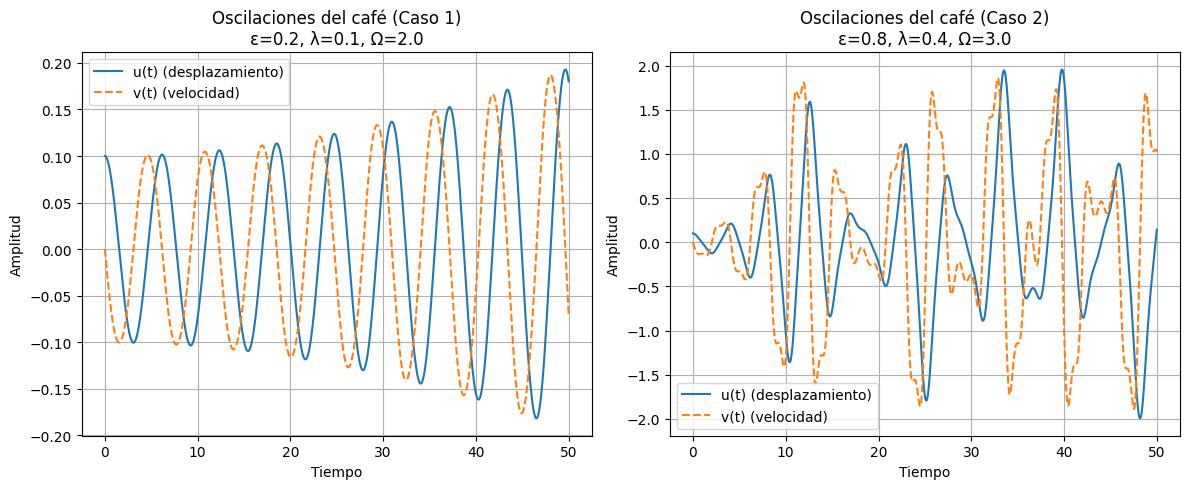

In [ ]:
def heun_system(f, a, b, y0, M, *args):
    """
    Método de Heun para resolver sistemas de ecuaciones diferenciales ordinarias.

    Parámetros:
    - f: función que define el sistema de EDOs (debe aceptar argumentos: t, y, *args)
    - a, b: extremos del intervalo
    - y0: condiciones iniciales (lista o array)
    - M: número de pasos
    - *args: parámetros adicionales para la función f

    Retorna:
    - T: vector de tiempos
    - Y: array con las soluciones en cada tiempo
    """
    h = (b - a) / M
    T = np.linspace(a, b, M+1)
    Y = np.zeros((M+1, len(y0)))
    Y[0] = y0

    for j in range(M):
        k1 = np.array(f(T[j], Y[j], *args))
        k2 = np.array(f(T[j] + h/3, Y[j] + (h/3) * k1, *args))
        k3 = np.array(f(T[j] + 2*h/3, Y[j] + (2*h/3) * k2, *args))
        Y[j+1] = Y[j] + (h/4) * (k1 + 3*k3)

    return T, Y

# Definimos el sistema de ecuaciones diferenciales
def coffee_slosh(t, y, epsilon, lambda_, Omega):
    u, v = y
    du_dt = v
    dv_dt = - (1 + epsilon * lambda_ * Omega**2 * np.cos(Omega * t)) * (u - (epsilon**2 * u**3) / 6)
    return [du_dt, dv_dt]

# Condiciones iniciales
u0 = 0.1  # Pequeña perturbación inicial
v0 = 0.0  # Velocidad inicial en reposo

# Rango de tiempo para la simulación
a, b = 0, 50
M = 1000  # Número de pasos

# Parámetros para el primer caso
params_1 = (0.2, 0.1, 2.0)
T1, Y1 = heun_system(coffee_slosh, a, b, [u0, v0], M, *params_1)

# Parámetros para el segundo caso
params_2 = (0.8, 0.4, 3.0)
T2, Y2 = heun_system(coffee_slosh, a, b, [u0, v0], M, *params_2)

# Graficamos los resultados
plt.figure(figsize=(12, 5))

# Caso 1
plt.subplot(1, 2, 1)
plt.plot(T1, Y1[:, 0], label="u(t) (desplazamiento)")
plt.plot(T1, Y1[:, 1], label="v(t) (velocidad)", linestyle="dashed")
plt.title(f"Oscilaciones del café (Caso 1)\nε={params_1[0]}, λ={params_1[1]}, Ω={params_1[2]}")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Caso 2
plt.subplot(1, 2, 2)
plt.plot(T2, Y2[:, 0], label="u(t) (desplazamiento)")
plt.plot(T2, Y2[:, 1], label="v(t) (velocidad)", linestyle="dashed")
plt.title(f"Oscilaciones del café (Caso 2)\nε={params_2[0]}, λ={params_2[1]}, Ω={params_2[2]}")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Por último vamos a analizar el comportamiento de los resultados obtenidos con los métodos solve_ivp y Heun en los dos conjuntos de parámetros:

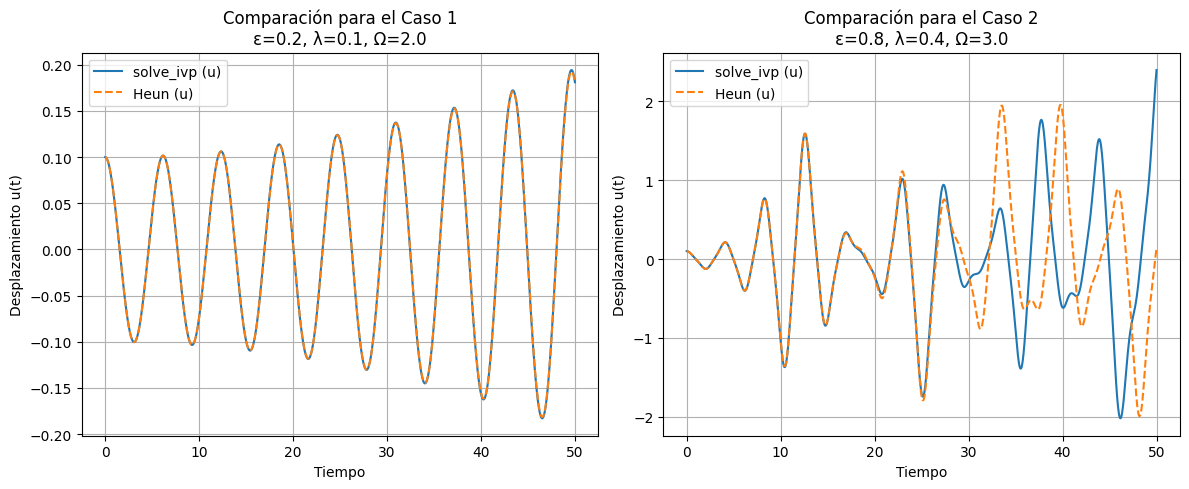

In [ ]:
# Definir los conjuntos de parámetros
params_caso1 = (0.2, 0.1, 2.0)  # Caso 1: Baja no linealidad
params_caso2 = (0.8, 0.4, 3.0)  # Caso 2: Alta no linealidad

# Resolver con solve_ivp para ambos casos
T1_ivp = np.linspace(a, b, M+1)
sol_caso1 = solve_ivp(coffee_slosh, (a, b), [u0, v0], args=params_caso1, t_eval=T1_ivp)

T2_ivp = np.linspace(a, b, M+1)
sol_case2 = solve_ivp(coffee_slosh, (a, b), [u0, v0], args=params_caso2, t_eval=T2_ivp)

# Resolver con el método de Heun
T1_heun, Y1_heun = heun_system(coffee_slosh, a, b, [u0, v0], M, *params_caso1)
T2_heun, Y2_heun = heun_system(coffee_slosh, a, b, [u0, v0], M, *params_caso2)

# Graficar la comparación entre Heun y solve_ivp
plt.figure(figsize=(12, 5))

# Comparación para el caso 1 (baja no linealidad)
plt.subplot(1, 2, 1)
plt.plot(sol_caso1.t, sol_caso1.y[0], label="solve_ivp (u)", linestyle="-")
plt.plot(T1_heun, Y1_heun[:, 0], label="Heun (u)", linestyle="dashed")
plt.title(f"Comparación para el Caso 1\nε={params_caso1[0]}, λ={params_caso1[1]}, Ω={params_caso1[2]}")
plt.xlabel("Tiempo")
plt.ylabel("Desplazamiento u(t)")
plt.legend()
plt.grid()

# Comparación para el caso 2 (alta no linealidad)
plt.subplot(1, 2, 2)
plt.plot(sol_case2.t, sol_case2.y[0], label="solve_ivp (u)", linestyle="-")
plt.plot(T2_heun, Y2_heun[:, 0], label="Heun (u)", linestyle="dashed")
plt.title(f"Comparación para el Caso 2\nε={params_caso2[0]}, λ={params_caso2[1]}, Ω={params_caso2[2]}")
plt.xlabel("Tiempo")
plt.ylabel("Desplazamiento u(t)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


En el primer caso contamos con una baja no linealidad, podemos observar que las soluciones de Heun y solve_ivp son practicamente iguales pues ambas siguen el mismo patrón de oscilación y no hay diferencias significativas. Esto indica que Heun es una buena aproximacion para sistemas moderadamente no lineales, además, es fácil de implementar y es eficiente computacionalmente.

Para el segundo caso tenemos una alta no linealidad, por lo que se observan diferencias más notorias pues la solución de Heun se desvía cada vez más a medida que avanzamos en el tiempo, esto sugiere que los efectos no lineales y de resonancia están ampliando las diferencias. La razón se debe a que Heun usa un tamaño de paso fijo mientras que solve_ivp ajusta dinámicamente el tamaño del paso evitando errores acumulativos.

En conclusión, Heun es eficiente y rápido para sistemas con un comportamiento suave, pero en sistemas más caóticos o con oscilaciones amplificadas, Heun empieza a perder precisión, mientras que solve_ivp sigue produciendo soluciones más confiables y precisas.

